# Logistic Regression

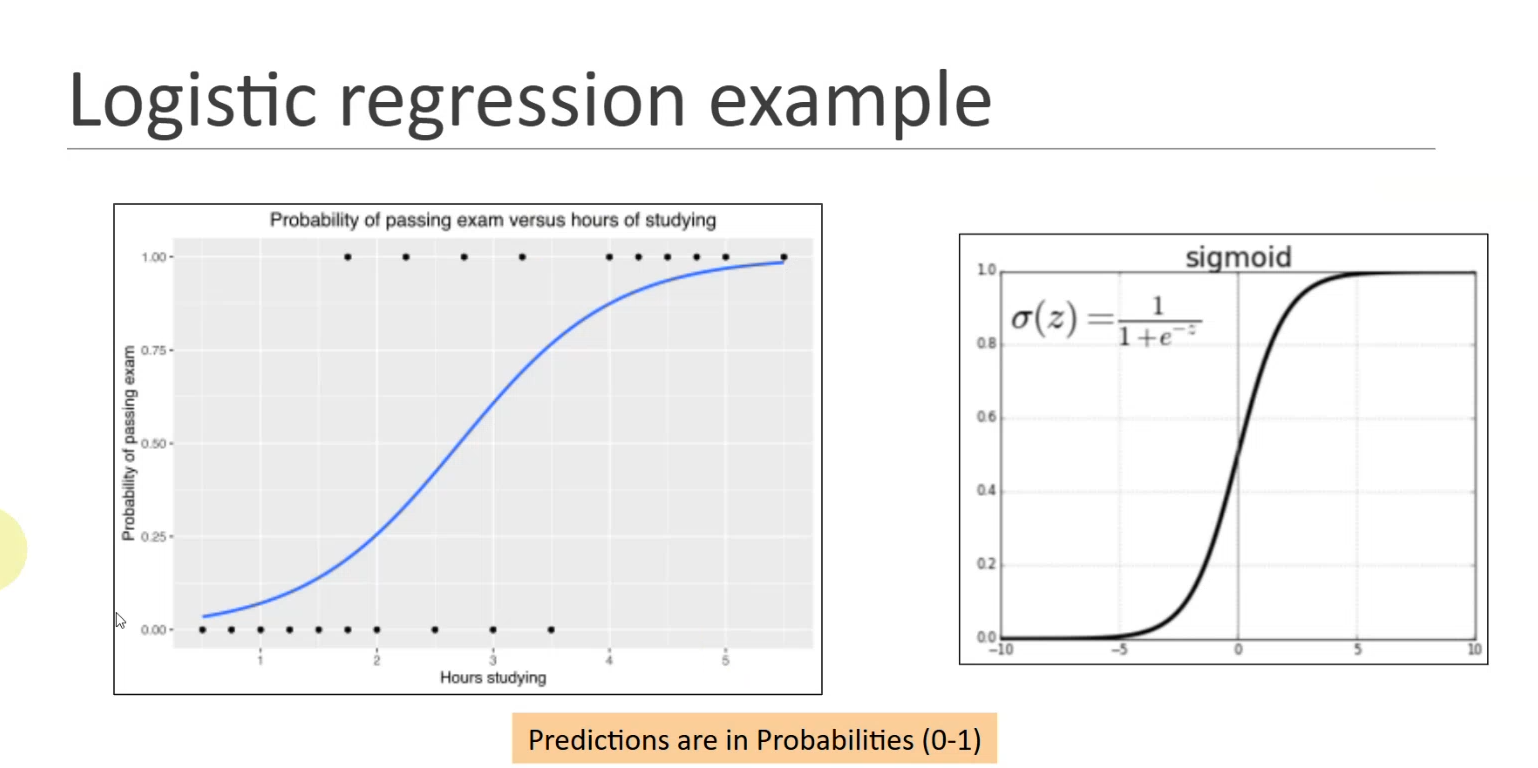

In [188]:
from warnings import filterwarnings
filterwarnings ("ignore")

In [189]:
import pandas as pd

In [190]:
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\Iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [191]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Trget - Species 

# Step 2 : Perform basic Data Quality Checks

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [193]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [194]:
df.duplicated().sum()

np.int64(0)

# Step 3 : Seperate X And Y

In [195]:
X =df.drop(columns=["Species"])
Y = df[["Species"]]

In [196]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [197]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [198]:
Y.value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species'>

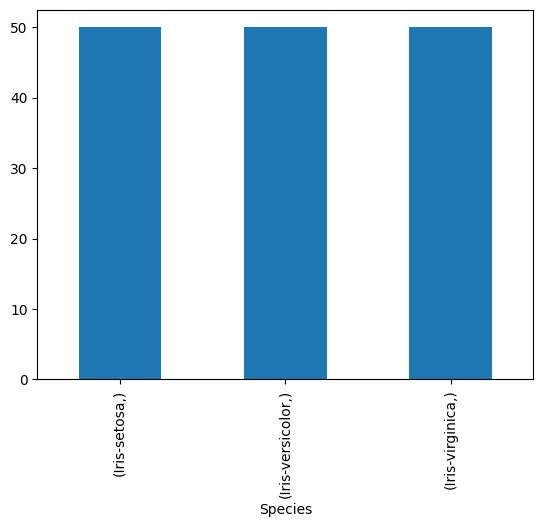

In [199]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Preprocessing on X

In [200]:
X.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

# Because only numeric features are there in X, hence we'll use inly Numerical pipeline

In [201]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [202]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [203]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [204]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


# Step 5 : Train test split

In [205]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(X_pre,Y, test_size=0.33, random_state=21)

In [206]:
xtrain.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
52,-0.519627,1.280340,0.106445,0.649027,0.396172
49,-0.588910,-1.021849,0.569251,-1.341272,-1.312977
65,-0.219398,1.038005,0.106445,0.364699,0.264699
118,1.004612,2.249683,-1.050569,1.786341,1.447956
55,-0.450343,-0.173674,-0.587764,0.421564,0.133226


In [207]:
ytrain.head()

,Species
52,Iris-versicolor
49,Iris-setosa
65,Iris-versicolor
118,Iris-virginica
55,Iris-versicolor


In [208]:
xtest.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,0.404154,-0.052506,-1.050569,0.137236,0.001753
44,-0.704383,-0.900681,1.726266,-1.056944,-1.050031
7,-1.558880,-1.021849,0.800654,-1.284407,-1.312977
21,-1.235557,-0.900681,1.494863,-1.284407,-1.050031
95,0.473438,-0.173674,-0.124958,0.250967,0.001753


In [209]:
ytest.head()

,Species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


In [210]:
xtrain.shape

(100, 5)

In [211]:
xtest.shape

(50, 5)

# Step 6 : Model Building

In [212]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xtrain,ytrain)

LogisticRegression()

In [213]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [214]:
model.intercept_

array([-0.34494308,  1.85630777, -1.51136468])

In [215]:
model.coef_

array([[-1.09676771, -0.82382955,  1.01471475, -1.35465113, -1.32563515],
       [-0.82186849,  0.26254864, -0.51109265,  0.02671802, -0.17953486],
       [ 1.9186362 ,  0.56128091, -0.5036221 ,  1.32793311,  1.50517001]])

# Step 7 : Model Evaluation

In [216]:
# Accuracy on train
model.score(xtrain, ytrain)

0.99

In [217]:
# Accuracy on test
model.score(xtest, ytest)

1.0

In [218]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [219]:
ytest.head()

,Species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


In [220]:

yprob_test = model.predict_proba(xtest)
yprob_test[0:5]

array([[1.52899477e-02, 8.77481468e-01, 1.07228584e-01],
       [9.86185380e-01, 1.38123153e-02, 2.30437360e-06],
       [9.78919032e-01, 2.10808130e-02, 1.54707589e-07],
       [9.87573356e-01, 1.24262845e-02, 3.59037115e-07],
       [5.54109903e-02, 8.09850523e-01, 1.34738487e-01]])

In [221]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [222]:

yprob_test[0]

array([0.01528995, 0.87748147, 0.10722858])

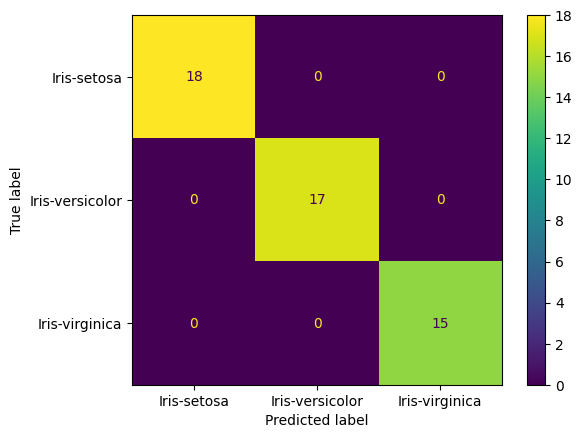

In [223]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [224]:

from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [225]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average="macro")

1.0

In [226]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=3, scoring="f1_macro")

scores

array([0.97101449, 1.        , 1.        ])

In [227]:
scores.mean()

np.float64(0.9903381642512077)

# From above metrics i have good f1_macro > 0.8 hence it is good model and can be used for out of sample prediction

In [228]:
path2 = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\sampleIris.csv"

In [229]:
xnew = pd.read_csv(path2)
xnew

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,-0.414976,-1.287108,0.142468,0.138633
1,1,1.275726,0.092598,0.766812,1.454321
2,2,-0.898033,-1.287108,-0.425118,-0.124505
3,3,-1.743384,-0.367304,0.312744,-1.308624
4,4,0.068082,-0.137353,0.766812,0.796477
5,5,-0.414976,1.012401,-1.390014,-1.308624
6,6,-0.294211,-0.137353,-0.084566,0.138633
7,7,0.792668,-0.137353,0.823571,1.059614
8,8,-0.656505,1.472303,-1.276496,-1.308624
9,9,-0.898033,0.782450,-1.276496,0.138633


In [230]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [231]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.743637,-7.583060,-10.045453,-2.056377,-1.393658
1,-1.720542,-5.534473,-6.852772,-1.701339,0.336116
2,-1.697448,-8.168370,-10.045453,-2.379139,-1.739613
3,-1.674353,-9.192664,-7.916999,-1.959548,-3.296410
4,-1.651258,-6.997749,-7.384885,-1.701339,-0.528771
5,-1.628164,-7.583060,-4.724321,-2.927834,-3.296410
6,-1.605069,-7.436732,-7.384885,-2.185481,-1.393658
7,-1.581975,-6.119784,-7.384885,-1.669063,-0.182817
8,-1.558880,-7.875716,-3.660094,-2.863281,-3.296410
9,-1.535786,-8.168370,-5.256434,-2.863281,-1.393658


In [232]:
preds = model.predict(xnew_pre)
preds

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [233]:
probs = model.predict_proba(xnew_pre)
probs

array([[1.24513766e-02, 9.87548442e-01, 1.81377245e-07],
       [1.46752102e-02, 9.85314137e-01, 1.06527584e-05],
       [5.17658302e-02, 9.48234109e-01, 6.08778969e-08],
       [9.34060075e-01, 6.59399245e-02, 4.22929183e-10],
       [7.89403413e-02, 9.21057855e-01, 1.80411586e-06],
       [9.99174283e-01, 8.25716809e-04, 2.82436259e-12],
       [4.17608005e-01, 5.82391854e-01, 1.40869956e-07],
       [2.04168150e-02, 9.79577552e-01, 5.63302582e-06],
       [9.99867918e-01, 1.32082043e-04, 5.48728142e-13],
       [9.90311573e-01, 9.68842614e-03, 9.57788361e-10],
       [4.95017902e-02, 9.50497777e-01, 4.32442073e-07],
       [1.07013639e-02, 9.89298503e-01, 1.33530509e-07],
       [1.10569269e-03, 9.98847718e-01, 4.65891550e-05],
       [6.86368416e-02, 9.31361236e-01, 1.92258115e-06],
       [1.96398473e-04, 9.99802109e-01, 1.49283368e-06]])

In [234]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [235]:
xnew["species_pred"] = preds
xnew[model.classes_] = probs

In [236]:
xnew = xnew.round(4)

In [237]:
xnew

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_pred,Iris-setosa,Iris-versicolor,Iris-virginica
0,0,-0.4150,-1.2871,0.1425,0.1386,Iris-versicolor,0.0125,0.9875,0.0
1,1,1.2757,0.0926,0.7668,1.4543,Iris-versicolor,0.0147,0.9853,0.0
2,2,-0.8980,-1.2871,-0.4251,-0.1245,Iris-versicolor,0.0518,0.9482,0.0
3,3,-1.7434,-0.3673,0.3127,-1.3086,Iris-setosa,0.9341,0.0659,0.0
4,4,0.0681,-0.1374,0.7668,0.7965,Iris-versicolor,0.0789,0.9211,0.0
5,5,-0.4150,1.0124,-1.3900,-1.3086,Iris-setosa,0.9992,0.0008,0.0
6,6,-0.2942,-0.1374,-0.0846,0.1386,Iris-versicolor,0.4176,0.5824,0.0
7,7,0.7927,-0.1374,0.8236,1.0596,Iris-versicolor,0.0204,0.9796,0.0
8,8,-0.6565,1.4723,-1.2765,-1.3086,Iris-setosa,0.9999,0.0001,0.0
9,9,-0.8980,0.7824,-1.2765,0.1386,Iris-setosa,0.9903,0.0097,0.0


In [238]:
xnew.to_csv("LogisticResult.csv", index=False)

# Save the preprocessor and model object

In [239]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [240]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [241]:
model

LogisticRegression()

In [242]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [243]:
joblib.dump(model, "logistic.joblib")

['logistic.joblib']

In [244]:
# Open the models with joblib

In [245]:
p = joblib.load("pre.joblib")

In [246]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [247]:
m = joblib.load("logistic.joblib")
m

LogisticRegression()